In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.integrate import simps
from numpy import trapz
import statistics

In [2]:
DO1 = pd.read_csv('ICU 1 door open.csv')
DO1 = DO1.drop(range(0,4))

DO1_Alt = pd.read_csv('ICU 1 door open.csv')
DO1_Alt = DO1_Alt.drop(range(0,4))

DC1 = pd.read_csv('ICU 1 door closed.csv')
DC1 = DC1.drop(range(0,5))

DC1_Alt = pd.read_csv('ICU 1 door closed.csv')
DC1_Alt = DC1_Alt.drop(range(0,5))

NP1 = pd.read_csv('ICU 1 negative pressure.csv')
NP1 = NP1.drop(range(0,5))

NP1_Alt = pd.read_csv('ICU 1 negative pressure.csv')
NP1_Alt = NP1_Alt.drop(range(0,5))

DO2 = pd.read_csv('ICU 2 door open.csv')
DO2 = DO2.drop(range(0,7))

DO2_Alt = pd.read_csv('ICU 2 door open.csv')
DO2_Alt = DO2_Alt.drop(range(0,7))

DC2 = pd.read_csv('ICU 2 door closed.csv')
DC2 = DC2.drop(range(0,6))

DC2_Alt = pd.read_csv('ICU 2 door closed.csv')
DC2_Alt = DC2_Alt.drop(range(0,6))

EE502DO = pd.read_csv('EE 502 Door Open.csv')
EE502DO = EE502DO.drop(range(0,42))

EE502DO_Alt = pd.read_csv('EE 502 Door Open.csv')
EE502DO_Alt = EE502DO_Alt.drop(range(0,42))

EE502DC = pd.read_csv('EE 502 Door Closed.csv')
EE502DC = EE502DC.drop(range(0,39))

EE502DC_Alt = pd.read_csv('EE 502 Door Closed.csv')
EE502DC_Alt = EE502DC_Alt.drop(range(0,39))

EE502NP = pd.read_csv('EE 502 Negative Pressure.csv')
EE502NP = EE502NP.drop(range(0,4))

EE502NP_Alt = pd.read_csv('EE 502 Negative Pressure.csv')
EE502NP_Alt = EE502NP_Alt.drop(range(0,4))

EE504DO = pd.read_csv('EE 504 Door Open.csv')
EE504DO = EE504DO.drop(range(0,50))

EE504DO_Alt = pd.read_csv('EE 504 Door Open.csv')
EE504DO_Alt = EE504DO_Alt.drop(range(0,50))

In [3]:
## Only run this cell once. If you run it twice, run the next cell ONCE, comment it out, and run this cell once again
DO1.insert(0, "Time", np.arange(0, 920, 10), True)
DO1_Alt.insert(0, "Time", np.arange(0,920,10), True)

DC1.insert(0, "Time", np.arange(0, 910, 10), True)
DC1_Alt.insert(0, "Time", np.arange(0, 910, 10), True)

NP1.insert(0, "Time", np.arange(0, 610, 10), True)
NP1_Alt.insert(0, "Time", np.arange(0, 610, 10), True)

DO2.insert(0, "Time", np.arange(0, 590, 10), True)
DO2_Alt.insert(0, "Time", np.arange(0, 590, 10), True)

DC2.insert(0, "Time", np.arange(0, 600, 10), True)
DC2_Alt.insert(0, "Time", np.arange(0, 600, 10), True)

EE502DO.insert(0, "Time", np.arange(0, 909, 1), True)
EE502DO_Alt.insert(0, "Time", np.arange(0, 909, 1), True)

EE502DC.insert(0, "Time", np.arange(0, 912, 1), True)
EE502DC_Alt.insert(0, "Time", np.arange(0, 912, 1), True)

EE502NP.insert(0, "Time", np.arange(0, 647, 1), True)
EE502NP_Alt.insert(0, "Time", np.arange(0, 647, 1), True)

EE504DO.insert(0, "Time", np.arange(0, 601, 1), True)
EE504DO_Alt.insert(0, "Time", np.arange(0, 601, 1), True)

## For 3 Zones

In [4]:
DC1_Alt['Zone 1'] = DC1_Alt[['S-01', 'S-04', 'S-06']].mean(axis=1)
DC1_Alt['Zone 2'] = DC1_Alt[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
DC1_Alt['Zone 3'] = DC1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DC1_Alt['Indoor Average'] = DC1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)

# DO1_Alt['Zone 1'] = DO1_Alt[['S-01', 'S-04', 'S-06']].mean(axis=1)
# DO1_Alt['Zone 2'] = DO1_Alt[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
# DO1_Alt['Zone 3'] = DO1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DO1_Alt['Indoor Average'] = DO1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)

# NP1_Alt['Zone 1'] = NP1_Alt[['S-01', 'S-04', 'S-06']].mean(axis=1)
# NP1_Alt['Zone 2'] = NP1_Alt[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
# NP1_Alt['Zone 3'] = NP1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# NP1_Alt['Indoor Average'] = NP1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)

NP1_Alt['Zone 1'] = NP1_Alt[['S-06']].mean(axis=1)
NP1_Alt['Zone 2'] = NP1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)
NP1_Alt['Zone 3'] = NP1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
NP1_Alt['Indoor Average'] = NP1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

DO1_Alt['Zone 1'] = DO1_Alt[['S-01', 'S-06']].mean(axis=1)
DO1_Alt['Zone 2'] = DO1_Alt[['S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
DO1_Alt['Zone 3'] = DO1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DO1_Alt['Indoor Average'] = DO1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)




DC2_Alt['Zone 1'] = DC2_Alt[['S-06', 'S-09', 'S-10']].mean(axis=1)
DC2_Alt['Zone 2'] = DC2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-12', 'S-13', 'S-14']].mean(axis=1)
DC2_Alt['Zone 3'] = DC2_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DC2_Alt['Indoor Average'] = DC2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# DO2_Alt['Zone 1'] = DO2_Alt[['S-06', 'S-09', 'S-10']].mean(axis=1)
# DO2_Alt['Zone 2'] = DO2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-12', 'S-13', 'S-14']].mean(axis=1)
# DO2_Alt['Zone 3'] = DO2_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DO2_Alt['Indoor Average'] = DO2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

DO2_Alt['Zone 1'] = DO2_Alt[['S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
DO2_Alt['Zone 2'] = DO2_Alt[['S-01', 'S-08', 'S-12']].mean(axis=1)
DO2_Alt['Zone 3'] = DO2_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DO2_Alt['Indoor Average'] = DO2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)



EE502DC_Alt['Zone 1'] = EE502DC_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
EE502DC_Alt['Zone 2'] = EE502DC_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13', 'S-15']].mean(axis=1)
EE502DC_Alt['Zone 3'] = EE502DC_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE502DC_Alt['Indoor Average'] = EE502DC_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE502DO_Alt['Zone 1'] = EE502DO_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
# EE502DO_Alt['Zone 2'] = EE502DO_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13', 'S-15']].mean(axis=1)
# EE502DO_Alt['Zone 3'] = EE502DO_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502DO_Alt['Indoor Average'] = EE502DO_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE502NP_Alt['Zone 1'] = EE502NP_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
# EE502NP_Alt['Zone 2'] = EE502NP_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13', 'S-15']].mean(axis=1)
# EE502NP_Alt['Zone 3'] = EE502NP_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502NP_Alt['Indoor Average'] = EE502NP_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

EE502DO_Alt['Zone 1'] = EE502DO_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-10', 'S-11', 'S-12']].mean(axis=1)
EE502DO_Alt['Zone 2'] = EE502DO_Alt[['S-02', 'S-08', 'S-13', 'S-15']].mean(axis=1)
EE502DO_Alt['Zone 3'] = EE502DO_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE502DO_Alt['Indoor Average'] = EE502DO_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

EE502NP_Alt['Zone 1'] = EE502NP_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-12']].mean(axis=1)
EE502NP_Alt['Zone 2'] = EE502NP_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-13', 'S-15']].mean(axis=1)
EE502NP_Alt['Zone 3'] = EE502NP_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE502NP_Alt['Indoor Average'] = EE502NP_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)



EE504DO_Alt['Zone 1'] = EE504DO_Alt[['S-01', 'S-03', 'S-06']].mean(axis=1)
EE504DO_Alt['Zone 2'] = EE504DO_Alt[['S-02', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)
EE504DO_Alt['Zone 3'] = EE504DO_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE504DO_Alt['Indoor Average'] = EE504DO_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)


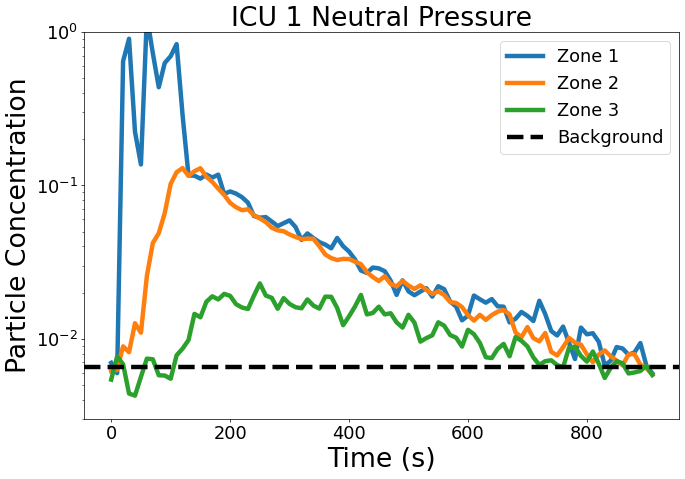

In [5]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Zone 1']/(100*110), linewidth=5.0)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Zone 2']/(100*110), linewidth=5.0)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Zone 3']/(100*110), linewidth=5.0)
plt.title('ICU 1 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0065, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [6]:
ins = [0]*len(DO1_Alt['Time'])
doors = [0]*len(DO1_Alt['Time'])
ns = [0]*len(DO1_Alt['Time'])
totavg = [0]*len(DO1_Alt['Time'])


for x in range(len(DO1_Alt['Time'])):
    
    ins[x] = (((DO1_Alt['S-01'].values[x]+DO1_Alt['S-02'].values[x]+DO1_Alt['S-03'].values[x]+DO1_Alt['S-04'].values[x]+DO1_Alt['S-05'].values[x]+DO1_Alt['S-06'].values[x]+DO1_Alt['S-07'].values[x]+DO1_Alt['S-08'].values[x]+DO1_Alt['S-09'].values[x]+DO1_Alt['S-10'].values[x]+DO1_Alt['S-12'].values[x]+DO1_Alt['S-13'].values[x]+DO1_Alt['S-14'].values[x])/(110))) - (0.0065*13)
    #print("Inside =", inside[x])

    doors[x] = (((DO1_Alt['S-15'].values[x]+DO1_Alt['S-18'].values[x]+DO1_Alt['S-19'].values[x])))/110 - (0.0065*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (DO1_Alt['S-16'].values[x]/(110)) - 0.0065
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (((DO1_Alt['S-01'].values[x] + DO1_Alt['S-02'].values[x] + DO1_Alt['S-03'].values[x] + DO1_Alt['S-04'].values[x] + DO1_Alt['S-05'].values[x] + DO1_Alt['S-06'].values[x] + DO1_Alt['S-07'].values[x] + DO1_Alt['S-08'].values[x] + DO1_Alt['S-09'].values[x] + DO1_Alt['S-10'].values[x] + DO1_Alt['S-12'].values[x] + DO1_Alt['S-13'].values[x] + DO1_Alt['S-14'].values[x] + DO1_Alt['S-15'].values[x] + DO1_Alt['S-16'].values[x] + DO1_Alt['S-18'].values[x] + DO1_Alt['S-19'].values[x])/(110))) - (0.0065*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   
    
averages = []
for x in range(21,24):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])
    
#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))

in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(21,24):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/3)
print("in_avg =", in_avg/3)
print("door_avg =", door_avg/3)
print("total_avg =", tot_avg/3)

Total Average at 21 = 99.37737878454546
Total Average at 22 = 94.87131817818181
Total Average at 23 = 94.75616666272725
percent difference =  0.030614857022173925
ns = 0.0050825294724198555
in_avg = 0.9332788776825919
door_avg = 0.061638592844988245
total_avg = 1.0


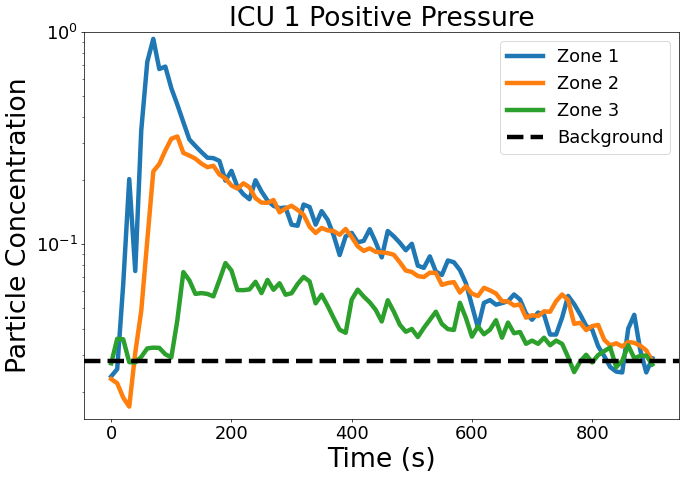

In [7]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 1']/(100*29), linewidth=5.0)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 2']/(100*29), linewidth=5.0)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 3']/(100*29), linewidth=5.0)
plt.title('ICU 1 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.015, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.028, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [8]:
ins = [0]*len(DC1_Alt['Time'])
doors = [0]*len(DC1_Alt['Time'])
ns = [0]*len(DC1_Alt['Time'])
totavg = [0]*len(DC1_Alt['Time'])


for x in range(len(DC1_Alt['Time'])):
    
    ins[x] = (((DC1_Alt['S-01'].values[x]+DC1_Alt['S-02'].values[x]+DC1_Alt['S-03'].values[x]+DC1_Alt['S-04'].values[x]+DC1_Alt['S-05'].values[x]+DC1_Alt['S-06'].values[x]+DC1_Alt['S-07'].values[x]+DC1_Alt['S-08'].values[x]+DC1_Alt['S-09'].values[x]+DC1_Alt['S-10'].values[x]+DC1_Alt['S-12'].values[x]+DC1_Alt['S-13'].values[x]+DC1_Alt['S-14'].values[x])/(110*29))) - (0.028*13)
    #print("Inside =", inside[x])

    doors[x] = ((DC1_Alt['S-15'].values[x]+DC1_Alt['S-18'].values[x]+DC1_Alt['S-19'].values[x])/(110*29)) - (0.028*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = DC1_Alt['S-16'].values[x]/(110*29) - 0.028
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (((DC1_Alt['S-01'].values[x] + DC1_Alt['S-02'].values[x] + DC1_Alt['S-03'].values[x] + DC1_Alt['S-04'].values[x] + DC1_Alt['S-05'].values[x] + DC1_Alt['S-06'].values[x] + DC1_Alt['S-07'].values[x] + DC1_Alt['S-08'].values[x] + DC1_Alt['S-09'].values[x] + DC1_Alt['S-10'].values[x] + DC1_Alt['S-12'].values[x] + DC1_Alt['S-13'].values[x] + DC1_Alt['S-14'].values[x] + DC1_Alt['S-15'].values[x] + DC1_Alt['S-16'].values[x] + DC1_Alt['S-18'].values[x] + DC1_Alt['S-19'].values[x])/(110*29))) - (0.028*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   
    
averages = []
for x in range(18,21):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])
    
#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))

in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(18,21):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/3)
print("in_avg =", in_avg/3)
print("door_avg =", door_avg/3)
print("total_avg =", tot_avg/3)

Total Average at 18 = 2.339151515141066
Total Average at 19 = 2.2042507836990595
Total Average at 20 = 2.1305830721003134
percent difference =  0.04894498030012462
ns = -9.317393383976441e-06
in_avg = 0.9277879461675215
door_avg = 0.07222137122586272
total_avg = 1.0


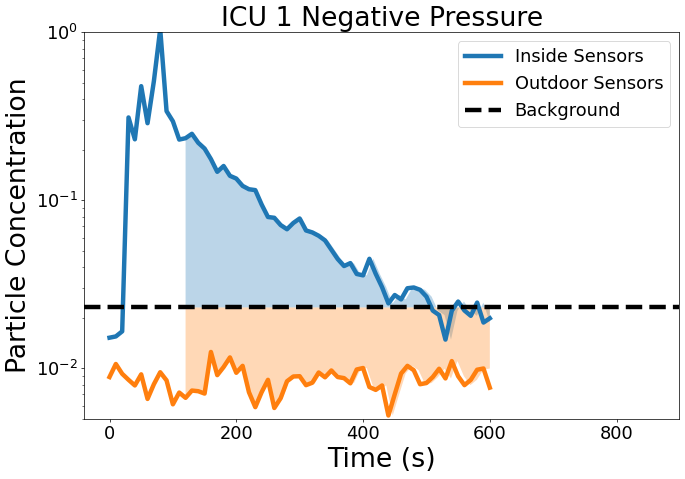

In [9]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(NP1_Alt['Time'], (NP1_Alt['Zone 1']+NP1_Alt['Zone 2'])/(100*75), linewidth=5.0)
plt.semilogy(NP1_Alt['Time'], NP1_Alt['Zone 3']/(100*75), linewidth=5.0)
plt.title('ICU 1 Negative Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
x = np.linspace(120,600,48)
plt.fill_between(x, (NP1_Alt['Zone 1'][12:60]/(100*75))+(NP1_Alt['Zone 2'][12:60]/(100*75)), 0.023, alpha=0.3)
plt.fill_between(x, NP1_Alt['Zone 3'][12:60]/(100*75), 0.023, alpha=0.3)
axes = plt.gca()
plt.ylim([0.005, 1])
plt.xlim([-40, 899])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.023, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Inside Sensors', 'Outdoor Sensors', 'Background'], prop = {'size':20})


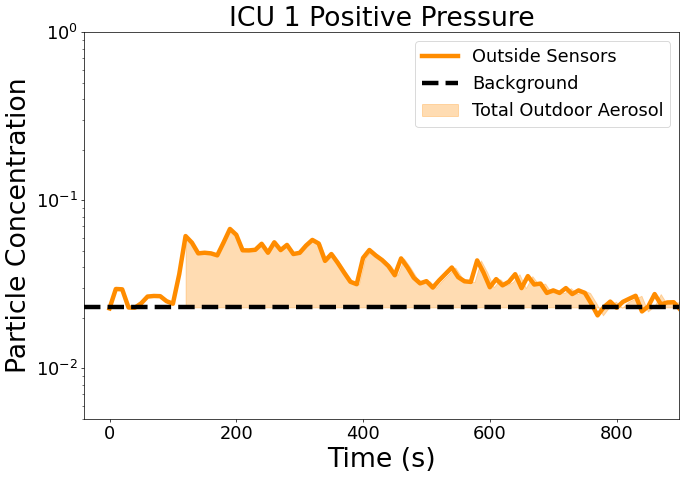

In [28]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC1_Alt['Time'], (DC1_Alt['Zone 1']+DC1_Alt['Zone 2'])/(100*35), linewidth=5.0)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 3']/(100*35), linewidth=5.0, color='darkorange')
plt.title('ICU 1 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
x = np.linspace(120,900,78)
plt.fill_between(x, (DC1_Alt['Zone 1'][12:90]/(100*35))+(DC1_Alt['Zone 2'][12:90]/(100*35)), 0.023, alpha=0.3)
plt.fill_between(x, DC1_Alt['Zone 3'][12:90]/(100*35), 0.023, alpha=0.3, color='darkorange')
axes = plt.gca()
plt.ylim([0.005, 1])
plt.xlim([-40, 899])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.023, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Inside Sensors', 'Outdoor Sensors', 'Background'], prop = {'size':20})


In [11]:
ins = [0]*len(NP1_Alt['Time'])
doors = [0]*len(NP1_Alt['Time'])
ns = [0]*len(NP1_Alt['Time'])
totavg = [0]*len(NP1_Alt['Time'])

for x in range(len(NP1_Alt['Time'])):
    
    ins[x] = (NP1_Alt['S-01'].values[x]+NP1_Alt['S-02'].values[x]+NP1_Alt['S-03'].values[x]+NP1_Alt['S-04'].values[x]+NP1_Alt['S-05'].values[x]+NP1_Alt['S-06'].values[x]+NP1_Alt['S-07'].values[x]+NP1_Alt['S-08'].values[x]+NP1_Alt['S-09'].values[x]+NP1_Alt['S-10'].values[x]+NP1_Alt['S-12'].values[x]+NP1_Alt['S-13'].values[x]+NP1_Alt['S-14'].values[x])/(100*33) - (0.023*13)
    #print("Inside =", inside[x])

    doors[x] = (NP1_Alt['S-15'].values[x]+NP1_Alt['S-18'].values[x]+NP1_Alt['S-19'].values[x])/(100*33) - (0.023*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (NP1_Alt['S-16'].values[x])/(100*33) - 0.023
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (NP1_Alt['S-01'].values[x] + NP1_Alt['S-02'].values[x] + NP1_Alt['S-03'].values[x] + NP1_Alt['S-04'].values[x] + NP1_Alt['S-05'].values[x] + NP1_Alt['S-06'].values[x] + NP1_Alt['S-07'].values[x] + NP1_Alt['S-08'].values[x] + NP1_Alt['S-09'].values[x] + NP1_Alt['S-10'].values[x] + NP1_Alt['S-12'].values[x] + NP1_Alt['S-13'].values[x] + NP1_Alt['S-14'].values[x] + NP1_Alt['S-15'].values[x] + NP1_Alt['S-16'].values[x] + NP1_Alt['S-18'].values[x] + NP1_Alt['S-19'].values[x])/(100*33) - (0.023*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   
    
averages = []
for x in range(18,21):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])

#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))


in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(18,21):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/3)
print("in_avg =", in_avg/3)
print("door_avg =", door_avg/3)
print("total_avg =", tot_avg/3)

Total Average at 18 = 1.706979797969697
Total Average at 19 = 1.5767777777575758
Total Average at 20 = 1.4324343434242424
percent difference =  0.07903773968482963
ns = -0.0051849040115615275
in_avg = 0.9985959970723591
door_avg = 0.006588906939202552
total_avg = 1.0


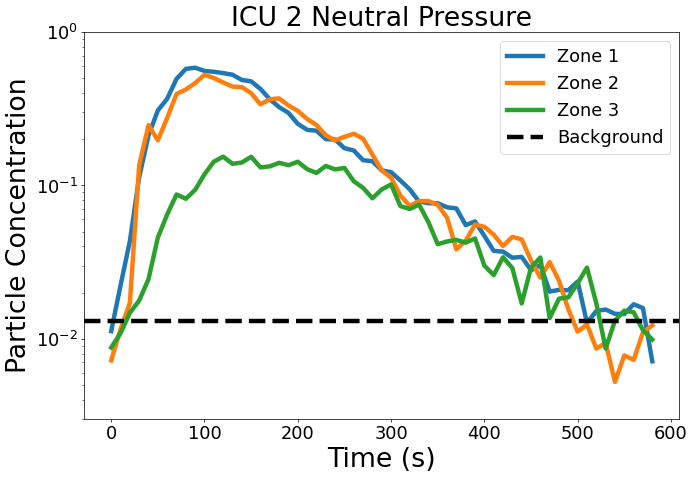

In [12]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 1']/(100*15), linewidth=5.0)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 2']/(100*15), linewidth=5.0)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 3']/(100*15), linewidth=5.0)
plt.title('ICU 2 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.013, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

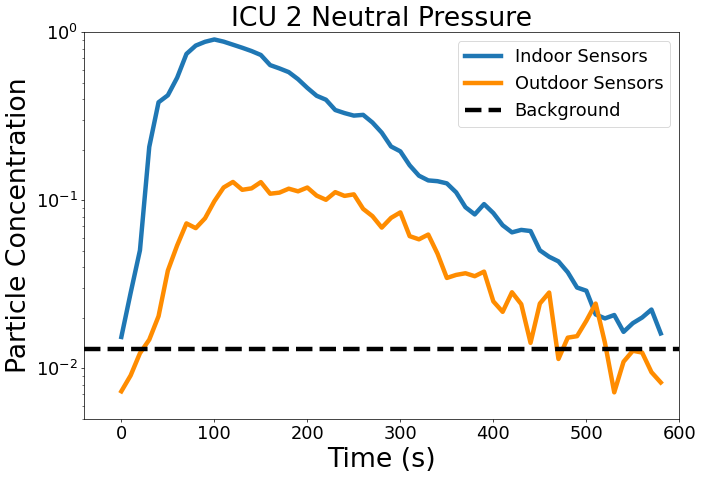

In [49]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO2_Alt['Time'], (DO2_Alt['Zone 1']+DO2_Alt['Zone 2'])/(100*18), linewidth=5.0)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 3']/(100*18), linewidth=5.0, color='darkorange')
plt.title('ICU 2 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
x = np.linspace(120,580,47)
#plt.fill_between(x, (DO2_Alt['Zone 1'][12:90]/(100*18))+(DO2_Alt['Zone 2'][12:90]/(100*18)), 0.013, alpha=0.3)
#plt.fill_between(x, DO2_Alt['Zone 3'][12:90]/(100*18), 0.013, alpha=0.3, color='darkorange')
axes = plt.gca()
plt.ylim([0.005, 1])
plt.xlim([-40, 600])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.013, color='black', linestyle='--', linewidth=5.0)
#plt.legend(['Inside Sensors', 'Background', 'Total Indoor Aerosol'], prop = {'size':20})
#plt.legend(['Outside Sensors', 'Background', 'Total Outdoor Aerosol'], prop = {'size':20})
plt.legend(['Indoor Sensors', 'Outdoor Sensors', 'Background'], prop = {'size':20})

In [ ]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(NP1_Alt['Time'], (DO2_Alt['Zone 1']+DO2_Alt['Zone 2'])/(100*18), linewidth=5.0)
#plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 3']/(100*18), linewidth=5.0, color='darkorange')
plt.title('ICU 2 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
x = np.linspace(120,580,47)
plt.fill_between(x, (DO2_Alt['Zone 1'][12:90]/(100*18))+(DO2_Alt['Zone 2'][12:90]/(100*18)), 0.013, alpha=0.3)
#plt.fill_between(x, DO2_Alt['Zone 3'][12:90]/(100*18), 0.013, alpha=0.3, color='darkorange')
axes = plt.gca()
plt.ylim([0.005, 1])
plt.xlim([-40, 600])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.013, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Inside Sensors', 'Background', 'Total Indoor Aerosol'], prop = {'size':20})
#plt.legend(['Outside Sensors', 'Background', 'Total Outdoor Aerosol'], prop = {'size':20})


In [13]:
ins = [0]*len(DO2_Alt['Time'])
doors = [0]*len(DO2_Alt['Time'])
ns = [0]*len(DO2_Alt['Time'])
totavg = [0]*len(DO2_Alt['Time'])


for x in range(len(DO2_Alt['Time'])):
    
    ins[x] = (DO2_Alt['S-01'].values[x]+DO2_Alt['S-02'].values[x]+DO2_Alt['S-03'].values[x]+DO2_Alt['S-04'].values[x]+DO2_Alt['S-05'].values[x]+DO2_Alt['S-06'].values[x]+DO2_Alt['S-07'].values[x]+DO2_Alt['S-08'].values[x]+DO2_Alt['S-09'].values[x]+DO2_Alt['S-10'].values[x]+DO2_Alt['S-12'].values[x]+DO2_Alt['S-13'].values[x]+DO2_Alt['S-14'].values[x])/(100*15) - (0.013*13)
    #print("Inside =", inside[x])

    doors[x] = (DO2_Alt['S-15'].values[x]+DO2_Alt['S-18'].values[x]+DO2_Alt['S-19'].values[x])/(100*15) - (0.013*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (DO2_Alt['S-16'].values[x])/(100*15) - 0.013
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (DO2_Alt['S-01'].values[x] + DO2_Alt['S-02'].values[x] + DO2_Alt['S-03'].values[x] + DO2_Alt['S-04'].values[x] + DO2_Alt['S-05'].values[x] + DO2_Alt['S-06'].values[x] + DO2_Alt['S-07'].values[x] + DO2_Alt['S-08'].values[x] + DO2_Alt['S-09'].values[x] + DO2_Alt['S-10'].values[x] + DO2_Alt['S-12'].values[x] + DO2_Alt['S-13'].values[x] + DO2_Alt['S-14'].values[x] + DO2_Alt['S-15'].values[x] + DO2_Alt['S-16'].values[x] + DO2_Alt['S-18'].values[x] + DO2_Alt['S-19'].values[x])/(100*15) - (0.013*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   

averages = []
for x in range(23,26):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])
    
    
#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))


in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(23,26):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/3)
print("in_avg =", in_avg/3)
print("door_avg =", door_avg/3)
print("total_avg =", tot_avg/3)

Total Average at 23 = 2.9606666666666666
Total Average at 24 = 2.8738333333333332
Total Average at 25 = 2.674
percent difference =  0.04205133978833586
ns = 0.004830327233549897
in_avg = 0.8339845682148304
door_avg = 0.1611851045516198
total_avg = 1.0


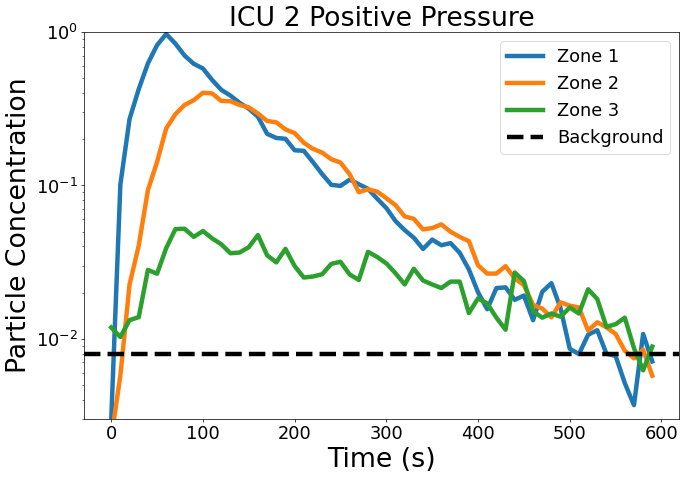

In [14]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Zone 1']/(100*19), linewidth=5.0)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Zone 2']/(100*19), linewidth=5.0)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Zone 3']/(100*19), linewidth=5.0)
plt.title('ICU 2 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.008, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [15]:
ins = [0]*len(DC2_Alt['Time'])
doors = [0]*len(DC2_Alt['Time'])
ns = [0]*len(DC2_Alt['Time'])
totavg = [0]*len(DC2_Alt['Time'])


for x in range(len(DC2_Alt['Time'])):
    
    ins[x] = (DC2_Alt['S-01'].values[x]+DC2_Alt['S-02'].values[x]+DC2_Alt['S-03'].values[x]+DC2_Alt['S-04'].values[x]+DC2_Alt['S-05'].values[x]+DC2_Alt['S-06'].values[x]+DC2_Alt['S-07'].values[x]+DC2_Alt['S-08'].values[x]+DC2_Alt['S-09'].values[x]+DC2_Alt['S-10'].values[x]+DC2_Alt['S-12'].values[x]+DC2_Alt['S-13'].values[x]+DC2_Alt['S-14'].values[x])/(100*19) - (0.008*13)
    #print("Inside =", inside[x])

    doors[x] = (DC2_Alt['S-15'].values[x]+DC2_Alt['S-18'].values[x]+DC2_Alt['S-19'].values[x])/(100*19) - (0.008*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (DC2_Alt['S-16'].values[x])/(100*19) - 0.008
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (DC2_Alt['S-01'].values[x] + DC2_Alt['S-02'].values[x] + DC2_Alt['S-03'].values[x] + DC2_Alt['S-04'].values[x] + DC2_Alt['S-05'].values[x] + DC2_Alt['S-06'].values[x] + DC2_Alt['S-07'].values[x] + DC2_Alt['S-08'].values[x] + DC2_Alt['S-09'].values[x] + DC2_Alt['S-10'].values[x] + DC2_Alt['S-12'].values[x] + DC2_Alt['S-13'].values[x] + DC2_Alt['S-14'].values[x] + DC2_Alt['S-15'].values[x] + DC2_Alt['S-16'].values[x] + DC2_Alt['S-18'].values[x] + DC2_Alt['S-19'].values[x])/(100*19) - (0.008*17) 
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   
    
averages = []
for x in range(17,20):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])

#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))


in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(17,20):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/3)
print("in_avg =", in_avg/3)
print("door_avg =", door_avg/3)
print("total_avg =", tot_avg/3)

Total Average at 17 = 3.2941315789473684
Total Average at 18 = 3.1870263157894736
Total Average at 19 = 2.9458421052631576
percent difference =  0.046081415382485114
ns = 0.006676453395874973
in_avg = 0.9653914126134092
door_avg = 0.02793213399071578
total_avg = 1.0


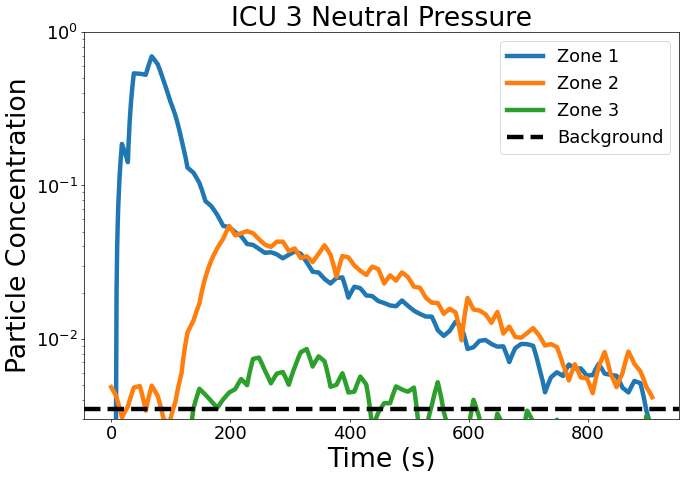

In [16]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 1']/(100*87), linewidth=5.0)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 2']/(100*87), linewidth=5.0)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 3']/(100*87), linewidth=5.0)
plt.title('ICU 3 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0035, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [17]:
ins = [0]*len(EE502DO_Alt['Time'])
doors = [0]*len(EE502DO_Alt['Time'])
ns = [0]*len(EE502DO_Alt['Time'])
totavg = [0]*len(EE502DO_Alt['Time'])


for x in range(len(EE502DO_Alt['Time'])):
    
    ins[x] = (EE502DO_Alt['S-01'].values[x]+EE502DO_Alt['S-02'].values[x]+EE502DO_Alt['S-03'].values[x]+EE502DO_Alt['S-04'].values[x]+EE502DO_Alt['S-05'].values[x]+EE502DO_Alt['S-06'].values[x]+EE502DO_Alt['S-07'].values[x]+EE502DO_Alt['S-08'].values[x]+EE502DO_Alt['S-09'].values[x]+EE502DO_Alt['S-10'].values[x]+EE502DO_Alt['S-11'].values[x]+EE502DO_Alt['S-12'].values[x]+EE502DO_Alt['S-13'].values[x]+EE502DO_Alt['S-15'].values[x])/(100*87) - (0.0035*13)
    #print("Inside =", inside[x])

    doors[x] = (EE502DO_Alt['S-16'].values[x]+EE502DO_Alt['S-17'].values[x]+EE502DO_Alt['S-18'].values[x])/(100*87) - (0.0035*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (EE502DO_Alt['S-19'].values[x])/(100*87) - (0.0035)
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (EE502DO_Alt['S-01'].values[x] + EE502DO_Alt['S-02'].values[x] + EE502DO_Alt['S-03'].values[x] + EE502DO_Alt['S-04'].values[x] + EE502DO_Alt['S-05'].values[x] + EE502DO_Alt['S-06'].values[x] + EE502DO_Alt['S-07'].values[x] + EE502DO_Alt['S-08'].values[x] + EE502DO_Alt['S-09'].values[x] + EE502DO_Alt['S-10'].values[x] + EE502DO_Alt['S-11'].values[x] + EE502DO_Alt['S-12'].values[x] + EE502DO_Alt['S-13'].values[x] + EE502DO_Alt['S-17'].values[x] + EE502DO_Alt['S-15'].values[x] + EE502DO_Alt['S-16'].values[x] + EE502DO_Alt['S-18'].values[x] + EE502DO_Alt['S-19'].values[x])/(100*87) - (0.0035*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   

    
averages = []
for x in range(300,330):
#      print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#      print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#      print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])

#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))


in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(300,330):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/30)
print("in_avg =", in_avg/30)
print("door_avg =", door_avg/30)
print("total_avg =", tot_avg/30)

Total Average at 300 = 0.4688295019195403
Total Average at 301 = 0.47180651340229884
Total Average at 302 = 0.47478352489655173
Total Average at 303 = 0.4777605364022989
Total Average at 304 = 0.4807375478850574
Total Average at 305 = 0.4837145593793104
Total Average at 306 = 0.4866915708850573
Total Average at 307 = 0.4896685823678162
Total Average at 308 = 0.49264559386206896
Total Average at 309 = 0.4900249042068966
Total Average at 310 = 0.48740421456321836
Total Average at 311 = 0.48478352489655174
Total Average at 312 = 0.4821628352413794
Total Average at 313 = 0.47954214559770114
Total Average at 314 = 0.4769214559310344
Total Average at 315 = 0.47430076627586204
Total Average at 316 = 0.4716800766321839
Total Average at 317 = 0.4690593869655173
Total Average at 318 = 0.4664386973103448
Total Average at 319 = 0.46264942527586206
Total Average at 320 = 0.45886015327586205
Total Average at 321 = 0.4550708812183909
Total Average at 322 = 0.45128160918390803
Total Average at 323 = 0

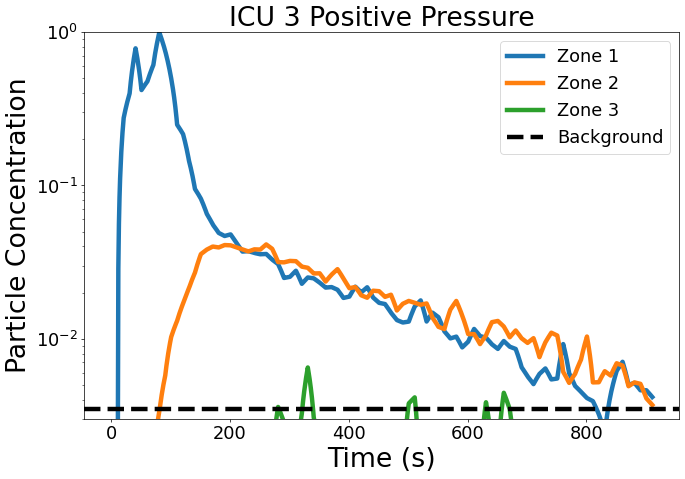

In [18]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 1']/(100*115), linewidth=5.0)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 2']/(100*115), linewidth=5.0)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 3']/(100*115), linewidth=5.0)
plt.title('ICU 3 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0035, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [19]:
ins = [0]*len(EE502DC_Alt['Time'])
doors = [0]*len(EE502DC_Alt['Time'])
ns = [0]*len(EE502DC_Alt['Time'])
totavg = [0]*len(EE502DC_Alt['Time'])


for x in range(len(EE502DC_Alt['Time'])):
    
    ins[x] = (EE502DC_Alt['S-01'].values[x]+EE502DC_Alt['S-02'].values[x]+EE502DC_Alt['S-03'].values[x]+EE502DC_Alt['S-04'].values[x]+EE502DC_Alt['S-05'].values[x]+EE502DC_Alt['S-06'].values[x]+EE502DC_Alt['S-07'].values[x]+EE502DC_Alt['S-08'].values[x]+EE502DC_Alt['S-09'].values[x]+EE502DC_Alt['S-10'].values[x]+EE502DC_Alt['S-11'].values[x]+EE502DC_Alt['S-12'].values[x]+EE502DC_Alt['S-13'].values[x]+EE502DC_Alt['S-15'].values[x])/(100*115) - (0.0035*13)
    #print("Inside =", inside[x])

    doors[x] = (EE502DC_Alt['S-16'].values[x]+EE502DC_Alt['S-17'].values[x]+EE502DC_Alt['S-18'].values[x])/(100*115) - (0.0035*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (EE502DC_Alt['S-19'].values[x])/(100*115) - 0.0035
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (EE502DC_Alt['S-01'].values[x] + EE502DC_Alt['S-02'].values[x] + EE502DC_Alt['S-03'].values[x] + EE502DC_Alt['S-04'].values[x] + EE502DC_Alt['S-05'].values[x] + EE502DC_Alt['S-06'].values[x] + EE502DC_Alt['S-07'].values[x] + EE502DC_Alt['S-08'].values[x] + EE502DC_Alt['S-09'].values[x] + EE502DC_Alt['S-10'].values[x] + EE502DC_Alt['S-11'].values[x] + EE502DC_Alt['S-12'].values[x] + EE502DC_Alt['S-13'].values[x] + EE502DC_Alt['S-17'].values[x] + EE502DC_Alt['S-15'].values[x] + EE502DC_Alt['S-16'].values[x] + EE502DC_Alt['S-18'].values[x] + EE502DC_Alt['S-19'].values[x])/(100*115) - (0.0035*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   

averages = []
for x in range(190,220):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])

#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))

    
in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(190,220):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/30)
print("in_avg =", in_avg/30)
print("door_avg =", door_avg/30)
print("total_avg =", tot_avg/30)

Total Average at 190 = 0.5613173913043478
Total Average at 191 = 0.5606739130434782
Total Average at 192 = 0.5612391304347827
Total Average at 193 = 0.561804347826087
Total Average at 194 = 0.5623695652173912
Total Average at 195 = 0.5629347826086956
Total Average at 196 = 0.5635
Total Average at 197 = 0.5640652173913044
Total Average at 198 = 0.5646304347826088
Total Average at 199 = 0.565195652173913
Total Average at 200 = 0.5657608695652173
Total Average at 201 = 0.5663260869565218
Total Average at 202 = 0.5615086956521739
Total Average at 203 = 0.5566913043478261
Total Average at 204 = 0.5518739130434783
Total Average at 205 = 0.5470565217391304
Total Average at 206 = 0.5422391304347826
Total Average at 207 = 0.5374217391304348
Total Average at 208 = 0.5326043478260869
Total Average at 209 = 0.5277869565217391
Total Average at 210 = 0.5229695652173914
Total Average at 211 = 0.5181521739130435
Total Average at 212 = 0.5133608695652174
Total Average at 213 = 0.5085695652173913
Total 

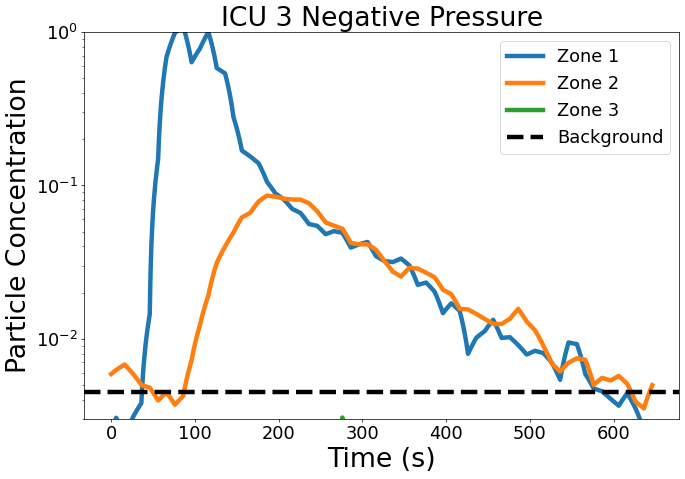

In [20]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 1']/(100*58), linewidth=5.0)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 2']/(100*58), linewidth=5.0)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 3']/(100*58), linewidth=5.0)
plt.title('ICU 3 Negative Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0045, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [21]:
ins = [0]*len(EE502NP_Alt['Time'])
doors = [0]*len(EE502NP_Alt['Time'])
ns = [0]*len(EE502NP_Alt['Time'])
totavg = [0]*len(EE502NP_Alt['Time'])


for x in range(len(EE502NP_Alt['Time'])):
    
    ins[x] = (EE502NP_Alt['S-01'].values[x]+EE502NP_Alt['S-02'].values[x]+EE502NP_Alt['S-03'].values[x]+EE502NP_Alt['S-04'].values[x]+EE502NP_Alt['S-05'].values[x]+EE502NP_Alt['S-06'].values[x]+EE502NP_Alt['S-07'].values[x]+EE502NP_Alt['S-08'].values[x]+EE502NP_Alt['S-09'].values[x]+EE502NP_Alt['S-10'].values[x]+EE502NP_Alt['S-11'].values[x]+EE502NP_Alt['S-12'].values[x]+EE502NP_Alt['S-13'].values[x]+EE502NP_Alt['S-15'].values[x])/(100*58) - (0.0045*13)
    #print("Inside =", inside[x])

    doors[x] = (EE502NP_Alt['S-16'].values[x]+EE502NP_Alt['S-17'].values[x]+EE502NP_Alt['S-18'].values[x])/(100*58) - (0.0045*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (EE502NP_Alt['S-19'].values[x])/(100*58) - 0.0045
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (EE502NP_Alt['S-01'].values[x] + EE502NP_Alt['S-02'].values[x] + EE502NP_Alt['S-03'].values[x] + EE502NP_Alt['S-04'].values[x] + EE502NP_Alt['S-05'].values[x] + EE502NP_Alt['S-06'].values[x] + EE502NP_Alt['S-07'].values[x] + EE502NP_Alt['S-08'].values[x] + EE502NP_Alt['S-09'].values[x] + EE502NP_Alt['S-10'].values[x] + EE502NP_Alt['S-11'].values[x] + EE502NP_Alt['S-12'].values[x] + EE502NP_Alt['S-13'].values[x] + EE502NP_Alt['S-17'].values[x] + EE502NP_Alt['S-15'].values[x] + EE502NP_Alt['S-16'].values[x] + EE502NP_Alt['S-18'].values[x] + EE502NP_Alt['S-19'].values[x])/(100*58) - (0.0045*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   
    
averages = []
for x in range(200,230):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])

#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))

    
in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(200,230):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/30)
print("in_avg =", in_avg/30)
print("door_avg =", door_avg/30)
print("total_avg =", tot_avg/30)

Total Average at 200 = 1.1087298850517242
Total Average at 201 = 1.1020632183965517
Total Average at 202 = 1.095396551724138
Total Average at 203 = 1.0887298850517242
Total Average at 204 = 1.0820632183965515
Total Average at 205 = 1.075396551724138
Total Average at 206 = 1.0687298850517242
Total Average at 207 = 1.0615459770172413
Total Average at 208 = 1.0543620689655173
Total Average at 209 = 1.0471781609137931
Total Average at 210 = 1.0399942528793102
Total Average at 211 = 1.0328103448275863
Total Average at 212 = 1.025626436775862
Total Average at 213 = 1.0184425287413792
Total Average at 214 = 1.0112586206896552
Total Average at 215 = 1.004074712637931
Total Average at 216 = 0.9968908046034481
Total Average at 217 = 0.9941091953965515
Total Average at 218 = 0.9913275862241377
Total Average at 219 = 0.9885459770172416
Total Average at 220 = 0.9857643678103449
Total Average at 221 = 0.9829827586379309
Total Average at 222 = 0.9802011494310343
Total Average at 223 = 0.9774195402241

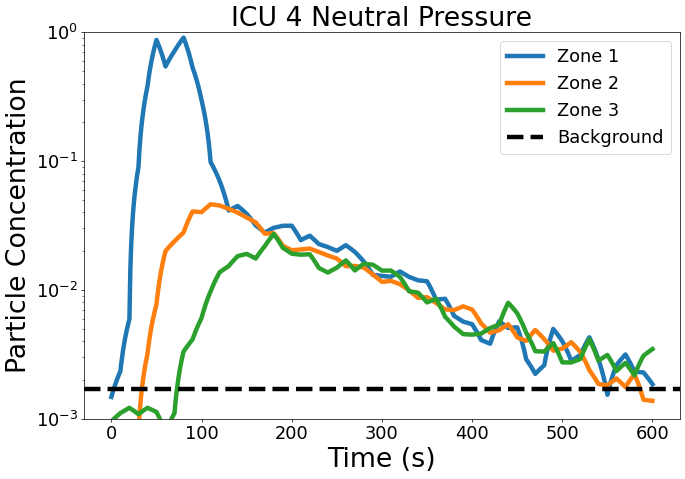

In [22]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Zone 1']/(100*115), linewidth=5.0)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Zone 2']/(100*115), linewidth=5.0)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Zone 3']/(100*115), linewidth=5.0)
plt.title('ICU 4 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.001, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0017, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

In [23]:
ins = [0]*len(EE504DO_Alt['Time'])
doors = [0]*len(EE504DO_Alt['Time'])
ns = [0]*len(EE504DO_Alt['Time'])
totavg = [0]*len(EE504DO_Alt['Time'])


for x in range(len(EE504DO_Alt['Time'])):
    
    ins[x] = (EE504DO_Alt['S-01'].values[x]+EE504DO_Alt['S-02'].values[x]+EE504DO_Alt['S-03'].values[x]+EE504DO_Alt['S-04'].values[x]+EE504DO_Alt['S-05'].values[x]+EE504DO_Alt['S-06'].values[x]+EE504DO_Alt['S-07'].values[x]+EE504DO_Alt['S-08'].values[x]+EE504DO_Alt['S-09'].values[x]+EE504DO_Alt['S-10'].values[x]+EE504DO_Alt['S-11'].values[x]+EE504DO_Alt['S-12'].values[x]+EE504DO_Alt['S-13'].values[x]+EE504DO_Alt['S-15'].values[x])/(100*15) - (0.0017*13)
    #print("Inside =", inside[x])

    doors[x] = (EE504DO_Alt['S-16'].values[x]+EE504DO_Alt['S-17'].values[x]+EE504DO_Alt['S-18'].values[x])/(100*15) - (0.0017*3)
    #print("Door Sensors =", door_sensors[x])

    ns[x] = (EE504DO_Alt['S-19'].values[x])/(100*15) - 0.0017
    #print("Nurse's Station =", nurses_station[x])
    
    totavg[x] = (EE504DO_Alt['S-01'].values[x] + EE504DO_Alt['S-02'].values[x] + EE504DO_Alt['S-03'].values[x] + EE504DO_Alt['S-04'].values[x] + EE504DO_Alt['S-05'].values[x] + EE504DO_Alt['S-06'].values[x] + EE504DO_Alt['S-07'].values[x] + EE504DO_Alt['S-08'].values[x] + EE504DO_Alt['S-09'].values[x] + EE504DO_Alt['S-10'].values[x] + EE504DO_Alt['S-11'].values[x] + EE504DO_Alt['S-12'].values[x] + EE504DO_Alt['S-13'].values[x] + EE504DO_Alt['S-17'].values[x] + EE504DO_Alt['S-15'].values[x] + EE504DO_Alt['S-16'].values[x] + EE504DO_Alt['S-18'].values[x] + EE504DO_Alt['S-19'].values[x])/(100*15) - (0.0017*17)
    #print("Total =", total[x])
    #print(x, '=', nurses_station[x]+inside[x]+door_sensors[x])   
    
    
averages = []
for x in range(200,230):
#     print("Inside fraction at ",x, "=", ins[x]/totavg[x])
#     print("Outside fraction at ",x, "=", doors[x]/totavg[x])
#     print("Nurse's Station fraction at ",x, "=", ns[x]/totavg[x])
    print("Total Average at",x, "=", totavg[x])
    averages.append(totavg[x])

#print(averages)
#print(statistics.variance(averages))
m = statistics.mean(averages)
#print((statistics.variance(averages))/m)
print("percent difference = ", 1 - m/max(averages))


in_avg = 0
door_avg = 0
ns_avg = 0
tot_avg = 0

for x in range(200,230):
    in_avg = ins[x]/totavg[x] + in_avg
    door_avg = doors[x]/totavg[x] + door_avg
    ns_avg = ns[x]/totavg[x] + ns_avg
    tot_avg = totavg[x]/totavg[x] + tot_avg

print("ns =", ns_avg/30)
print("in_avg =", in_avg/30)
print("door_avg =", door_avg/30)
print("total_avg =", tot_avg/30)

Total Average at 200 = 2.9970999999999997
Total Average at 201 = 2.9818999999999996
Total Average at 202 = 2.966699999933333
Total Average at 203 = 2.9515000000000002
Total Average at 204 = 2.9363
Total Average at 205 = 2.9210999999333334
Total Average at 206 = 2.9059
Total Average at 207 = 2.8907
Total Average at 208 = 2.8754999999333335
Total Average at 209 = 2.8603
Total Average at 210 = 2.8451
Total Average at 211 = 2.853233333333333
Total Average at 212 = 2.861366666666666
Total Average at 213 = 2.8695
Total Average at 214 = 2.8776333333333333
Total Average at 215 = 2.8857666666666666
Total Average at 216 = 2.8939
Total Average at 217 = 2.902033333333333
Total Average at 218 = 2.9101666666666666
Total Average at 219 = 2.9183
Total Average at 220 = 2.926433333333333
Total Average at 221 = 2.8943888888666667
Total Average at 222 = 2.8623444443999997
Total Average at 223 = 2.8303
Total Average at 224 = 2.798255555533333
Total Average at 225 = 2.7662111110666667
Total Average at 226 =